In [1]:
#Excited state calculations with VQE
import tequila as tq
geomstring="C 0.0 0.0 0.0\nH 0.0 0.0 {R}\nCl 0.0 0.0 -1.767\nCl 1.767 0.0 0.0\nCl 0.0 1.767 0.0"
fci_gs = []
fci_es = []
energies_gs = []
energies_es = []
P0 = tq.paulis.Projector("|00>")
for R in [0.3 + 0.1*i for i in range(25)]:
    print("Optimizing point R={:2.1f}".format(R))
    active = {"A'":[16,17,18], 'A"':[0,1,2]}
    mol = tq.chemistry.Molecule(geometry=geomstring.format(R=R), basis_set="cc-pVDZ", active_orbitals=active)
    H = mol.make_hamiltonian()
    results = []
    for i in range(2):
        # labeling ensures that tequila can distinguish the variables
        # singles can break the symmetry here falling into different states than the two above
        # (i.e. the open-shell singly excited manifold: in jordan_wigner those states are build from
        #  |1001> and |0110>)
        U = mol.make_upccgsd_ansatz(name="2-UpCCGD", label=i) 
        E = tq.ExpectationValue(U, H)
        active_vars = E.extract_variables()
        angles = {angle: 0.0 for angle in active_vars}
        for data, U2 in results:
            S2 = tq.ExpectationValue(H=P0, U=U + U2.dagger())
            E -= data.energy * S2
            angles = {**angles, **data.angles}
        print("Starting to optimize state ", i)
        result = tq.optimizer_scipy.minimize(E, silent=True, method="bfgs", variables=active_vars, initial_values=angles)
        print("finished with energy {:2.8f}".format(result.energy))
        results.append((result, U))
    energies_gs.append(results[0][0].energy)
    energies_es.append(results[1][0].energy)

Optimizing point R=0.3
Starting to optimize state  0
finished with energy -1413.18683912
Starting to optimize state  1
finished with energy -1412.44250488
Optimizing point R=0.4
Starting to optimize state  0
finished with energy -1414.89025680
Starting to optimize state  1
finished with energy -1414.14050293
Optimizing point R=0.5
Starting to optimize state  0
finished with energy -1415.77039420
Starting to optimize state  1
finished with energy -1415.01550293
Optimizing point R=0.6
Starting to optimize state  0
finished with energy -1416.24299297
Starting to optimize state  1
finished with energy -1415.48327637
Optimizing point R=0.7
Starting to optimize state  0
finished with energy -1416.49884516
Starting to optimize state  1
finished with energy -1415.73620605
Optimizing point R=0.8
Starting to optimize state  0
finished with energy -1416.63495204
Starting to optimize state  1
finished with energy -1415.87451172
Optimizing point R=0.9
Starting to optimize state  0
finished with ene

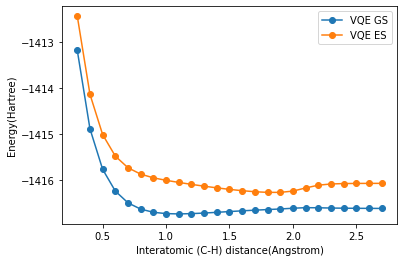

In [2]:
import matplotlib.pyplot as plt
R =  [0.3 + 0.1*i for i in range(len(energies_gs))]
plt.figure()
plt.plot(R, energies_gs, marker="o", label="VQE GS")
plt.plot(R, energies_es, marker="o", label="VQE ES")
plt.xlabel('Interatomic (C-H) distance(Angstrom)')
plt.ylabel('Energy(Hartree)')
plt.legend()
plt.show()